In [15]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [16]:
# Data loading
file_path = Path("../Unsupervised-Learning-Crypto-Currencies/crypto_data.csv")
df_crypto = pd.read_csv(file_path)
print(df_crypto)

     Unnamed: 0        CoinName Algorithm  IsTrading ProofType  \
0            42         42 Coin    Scrypt       True   PoW/PoS   
1           365         365Coin       X11       True   PoW/PoS   
2           404         404Coin    Scrypt       True   PoW/PoS   
3           611       SixEleven   SHA-256       True       PoW   
4           808             808   SHA-256       True   PoW/PoS   
...         ...             ...       ...        ...       ...   
1247        XBC     BitcoinPlus    Scrypt       True       PoS   
1248       DVTC      DivotyCoin    Scrypt      False   PoW/PoS   
1249       GIOT     Giotto Coin    Scrypt      False   PoW/PoS   
1250       OPSC  OpenSourceCoin   SHA-256      False   PoW/PoS   
1251       PUNK       SteamPunk       PoS      False       PoS   

      TotalCoinsMined TotalCoinSupply  
0        4.199995e+01              42  
1                 NaN      2300000000  
2        1.055185e+09       532000000  
3                 NaN          611000  
4      

List the DataFrame's data types to ensure they're aligned to the type of data stored on each column.

In [17]:
# List dataframe data types
df_crypto.dtypes


Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [18]:
#Remove rows with `false` values in 'IsTrading' Column.
df_crypto.drop(df_crypto[df_crypto['IsTrading'] == False].index, inplace=True)
print(df_crypto)

     Unnamed: 0     CoinName    Algorithm  IsTrading ProofType  \
0            42      42 Coin       Scrypt       True   PoW/PoS   
1           365      365Coin          X11       True   PoW/PoS   
2           404      404Coin       Scrypt       True   PoW/PoS   
3           611    SixEleven      SHA-256       True       PoW   
4           808          808      SHA-256       True   PoW/PoS   
...         ...          ...          ...        ...       ...   
1243       SERO   Super Zero       Ethash       True       PoW   
1244        UOS          UOS      SHA-256       True      DPoI   
1245        BDX       Beldex  CryptoNight       True       PoW   
1246        ZEN      Horizen     Equihash       True       PoW   
1247        XBC  BitcoinPlus       Scrypt       True       PoS   

      TotalCoinsMined TotalCoinSupply  
0        4.199995e+01              42  
1                 NaN      2300000000  
2        1.055185e+09       532000000  
3                 NaN          611000  
4      

In [19]:
# Remove the IsTrading Column
df_crypto = df_crypto.drop(columns=["IsTrading"])
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [14]:
# Find null values
for column in df_crypto.columns:
    print(f"Column {column} has {df_crypto[column].isnull().sum()} null values")



Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [20]:
# Remove all rows that have at least one null value.
df_crypto = df_crypto.dropna()
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [21]:
# Filter to keep total coins mined > 0.
coins_zero = df_crypto[df_crypto["TotalCoinsMined"] <= 0].index

final_df_crypto = df_crypto.drop(coins_zero)
final_df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [22]:
# Drop CoinName columns.
final_df_crypto = final_df_crypto.drop(["Unnamed: 0","CoinName"],axis=1)
final_df_crypto

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [23]:
# Convert columns "Algorithm" and "ProofType" to num data.
# Algorithm_dummies = pd.get_dummies(final_df["Algorithm"])
# ProofType_dummies = pd.get_dummies(final_df["ProofType"])
df_dummies = pd.get_dummies(final_df_crypto, columns=["Algorithm","ProofType"])
df_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_dummies["TotalCoinSupply"] = df_dummies["TotalCoinSupply"].astype(float)

df_dummies.dtypes

TotalCoinsMined                     float64
TotalCoinSupply                     float64
Algorithm_1GB AES Pattern Search      uint8
Algorithm_536                         uint8
Algorithm_Argon2d                     uint8
                                     ...   
ProofType_Proof of Authority          uint8
ProofType_Proof of Trust              uint8
ProofType_TPoS                        uint8
ProofType_Zero-Knowledge Proof        uint8
ProofType_dPoW/PoW                    uint8
Length: 98, dtype: object

In [25]:
# Standardize dataset.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies)
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [26]:
# Dimensionality reduction with PCA, preserving 90% of explained variance.
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)
pca_transformed_data.shape

(532, 74)

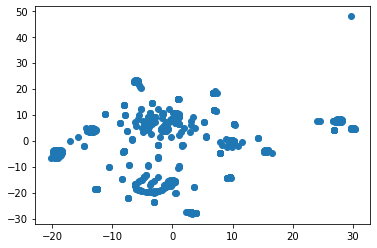

In [27]:
# Further reduce dataset dimensions by running t-SNE on PCA output.
tsne = TSNE(learning_rate=25)
transformed_features = tsne.fit_transform(pca_transformed_data)
# Scatter plot of t-SNE. 
df_dummies['x'] = transformed_features[:,0]
df_dummies['y'] = transformed_features[:,1]
# df2['class'] = df_dummies['Algorithm']

plt.scatter(df_dummies['x'], df_dummies['y'])
plt.show()


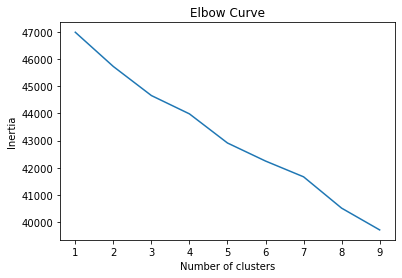

In [28]:
# Find best value for k
inertia = []
k = list(range(1, 10))

# Calculate inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_transformed_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(1,10)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)
    # Train the model
    model.fit(data)
    # Predict clusters
    predictions = model.predict(data)
    # Create return DataFrame with predicted clusters
    # data["class"] = model.labels_
    return data

def show_clusters(df):
    plt.scatter(df_dummies['x'], df_dummies['y'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

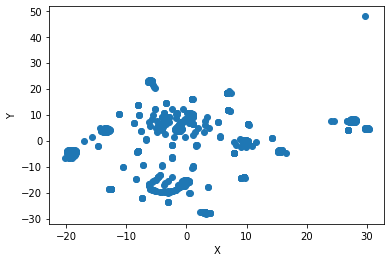

In [30]:
clusters = get_clusters(5, df_dummies) 

show_clusters(clusters)